<a href="https://colab.research.google.com/github/beangoben/deep_learning_escuela_verano_19/blob/master/notebooks/2a_ML_dia_a_dia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploración Visual de los Datos

<img src="https://www.anychart.com/blog/wp-content/uploads/2017/10/data-visualization-weekly-_.png" width="800" align="middle">

---

## Histogramas 1D
Uno de los primeros pasos en DS, es la **exploración visual de los datos**.

Una de las herramientas principales y más simple de **DataViz** son los histogramas. Inicialmente, estos son de gran ayuda para comprender un conjunto de datos. Anteriormente vieron dicha función herramienta, daré algunos detalles extras.

### Estilos de Graficación 

Una función de pyplot es que podemos escoger la **ESTÉTICA** de las gráficas con la directiva ``plt.style``. Por ejemplo, aqui se muestran el estilo ``seaborn-white`` y el ``classic`` parecido a las horribles gráficas de MATLAB. Yo en lo particular prefiero estilo R (``ggplot``).

Una lista de estilos puede encontrarse en https://matplotlib.org/3.2.0/gallery/style_sheets/style_sheets_reference.html, o con la instrucción ``pyplot.style.available``.

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('seaborn-white')
plt.style.use('classic')
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

In [0]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

### Generador de datos aleatorios 

Es importante entender, que las **diferentes formas** que sigan las distribuciones de las variables, nos permitirá elegir mejor entre modelos de acuerdo a sus propiedades.

La lista de generadores de números aleatorios disponibles para numpy puede encontrarse en https://numpy.org/doc/1.18/reference/random/generator.html.

In [0]:
np.random.seed(1)
data = np.random.standard_normal(10000) #Distribución Normal, media =0, sd=1

data1 = np.random.uniform(low=-3, high = 3, size = 10000) #Distribucion Uniforme
data2 = np.random.logseries(p=.33, size = 10000)*3 #Distribución logaritmica
data3 = np.random.lognormal(size=10000) #Distribución log-normal

### Ejercicio: Grafiquemos los datos

1. Graficar los histogramas de los los cuatro conjuntos utilizando la función ``subplot``.

2. Graficarlas los histogramas en un grid de $2 \times 2$

3. Usar solo ticks y títulos de los ejes exteriores usando la función ``label_outer()``.

Utilice para ello el siguiente material

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplot

<img src="https://i.pinimg.com/564x/64/fa/8b/64fa8ba87927253de443b85f46f6574b.jpg" width="500" align="middle">



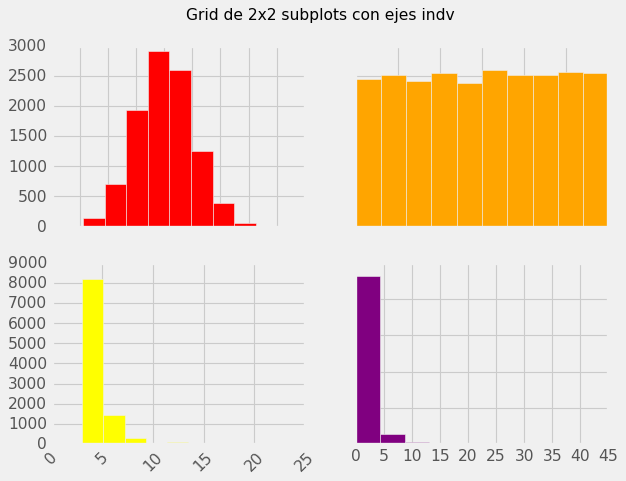

In [0]:
# Your Answer HERE

La función ``hist()`` tiene muchas opciones que pueden ser manipuladas para mejorar tanto los cálculos como la apariencia de la gráfica. Por ejemplo, podemos modificar los **bins**, el tipo de histograma con **histtype**, la orientación, color, etc.

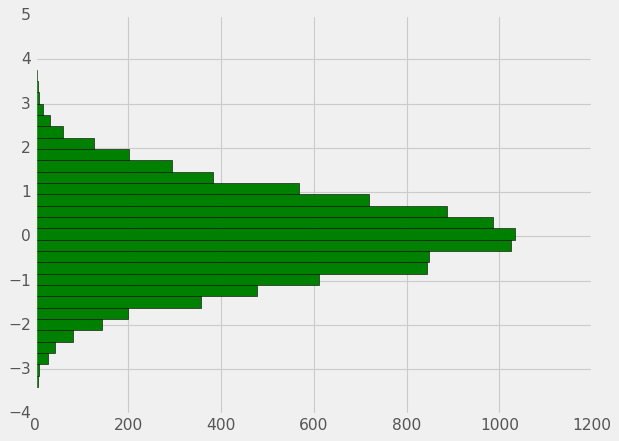

In [0]:
import matplotlib.patches

plt.hist(data,
         bins=30,
         histtype='bar', 
         color='green',
         orientation ='horizontal', 
         edgecolor = 'black',
         cumulative=False);

#### Ejercicio:

Cree una figura que combine los histogramas de los conjuntos ``Data``, ``Data1`` y ``Data3``. Acotelos entre un rango $[-5,10]$, utilice 60 bins y``histtype='stepfilled'``. 

Compare este histograma contra su copia modificando la transparencia con el parámetro ``alpha``. La comparación se debe hacer utilizando un grid $2 \times 1$.

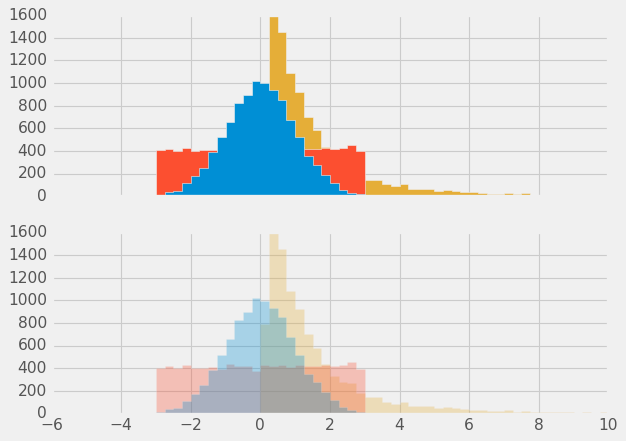

In [0]:
# Your answer here

En algunos casos, lo único que buscamos es calcular el histograma (es decir, los conteos por 'bin') sin desplegar nada. En este caso podemos utilizar la función ``np.histogram()`` de numpy:

In [0]:
counts, bin_edges = np.histogram(data, bins=10)
print(counts,bin_edges)
# print(bin_edges[:-1])

# print(bin_edges[1:bin_edges.shape[0]]-bin_edges[0:(bin_edges.shape[0]-1)])

# plt.bar(bin_edges,counts, width=0.7683289)
# plt.bar(bin_edges[:-1],counts, width=0.7683289);
# plt.show()

# plt.hist(data, bins=10);

[  14  151  699 1932 2909 2594 1248  388   55   10] [-3.6564401  -2.88811118 -2.11978227 -1.35145336 -0.58312444  0.18520447
  0.95353339  1.7218623   2.49019122  3.25852013  4.02684904]


---
## Histogramas Bi-Dimensionales

Del mismo modo que creamos histogramas en una dimensión, esto es, dividiendo una variable 1D en 'bins', también podemos crear histogramas en dos dimensiones dividiendo los datos entre 'bins' bidimensionales.
Veremos brevemente varias formas de hacer esto aquí.

### ``plt.hist2d``: Histograma en 2D

La forma más directa de realizar esto es utilizando la función ``plt.hist2d`` de  Matplotlib.

Utilicemos ``data`` y ``data1`` para crear el histograma 2D.

https://matplotlib.org/3.2.0/tutorials/colors/colormaps.html

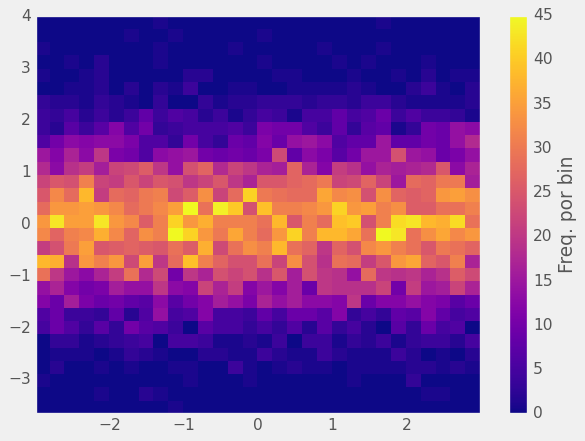

In [0]:
plt.hist2d(data1, data, bins=30, cmap='plasma')
cb = plt.colorbar()
cb.set_label('Freq. por bin')

### ``plt.hexbin``: Bins Hexagonales

El histograma 2D crea una teselación con un patrón de cuadrados. Otra forma natural para tal teselación es utilizando como patrón hexágonos regulares.
Para este propósito, Matplotlib proporciona la rutina `` plt.hexbin``, el cual representa a un conjunto de datos bidimensional dentro de una cuadrícula de hexágonos:

1.   List item
2.   List item



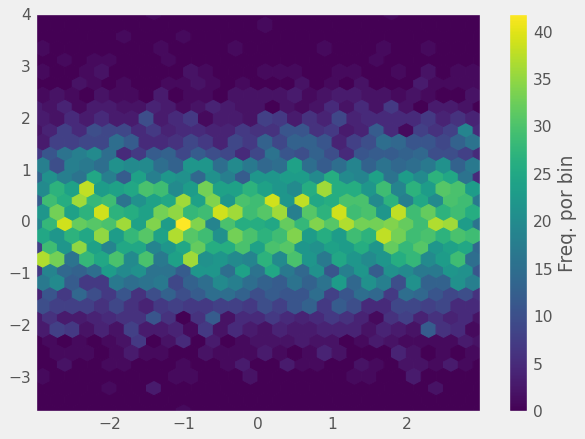

In [0]:
plt.hexbin(data1, data, gridsize=30, cmap='viridis')
cb = plt.colorbar(label='Freq. por bin')

Al igual que las otras gráficas de PyPlot, ``plt.hexbin`` tiene numerosas opciones, incluyendo la capacidad para especificar el peso de cada punto, y la capacidad de cambiar la salidad en cada bin utilizando una función de agregación de NumPy (la media de los pesos, desviación estandar, etc.).

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hexbin.html

Por otra parte, puede ser que solo querramos las frecuencias conjuntas, como lo hicimos para ``np.histogram``. En este sentido, ``NumPy`` cuenta con la función ``np.histogram2d``, la cual se puede usar de la siguiente forma:

In [0]:
counts, xedges, yedges = np.histogram2d(data1, data, bins=10)

En general, se puede calcular las frecuencias conjuntas utilizando la función ``np.histogramdd``.

---
## ``JoyPy``: ¿Joyplot o Ridgeline plot?

<img src="https://i.pinimg.com/originals/4d/13/11/4d1311bf34a7973db8080fd94780e6e4.jpg" width="600" align="middle">

El nombre "Joy Plot" aparentemente fue acuñado por Jenny Bryan en abril de 2017, como respuesta a una de sus visualizaciones usando este estilo en lenguage ``R``.

    ¿Qué es un Joyplot?

Los **Joyplots** son **gráficos de densidad apilados y parcialmente superpuestos**. Son una buena manera de comparar visualmente las distribuciones, especialmente aquellas que cambian en una dimensión (por ejemplo, con el tiempo).

El nombre se refiere a la clásica portada del álbum de 1979 **Unknown Pleasures** de Joy Division, que en realidad era un joyplot de intensidades de radio del primer púlsar conocido. Desafortunadamente, cuando el termino de esta visualización **joyplot** se popularizo, nadie en la comunidad de ciencia de datos estaba al tanto del origen del nombre de la banda "Joy Division". Como se describe en el libro *House of Dolls*, **las divisiones de alegría** eran grupos de mujeres judías en campos de concentración nazis mantenidas para el placer sexual de los soldados. La banda Joy Division tomó su nombre directamente de este libro [^joydivision].

Debido a esta razón, en el paquete que hace este gráfico en ``R`` se decidió renombrar este tipo de gráfico como **ridgeline plots** [^ridgeplot].

[^joydivision]: https://en.wikipedia.org/wiki/Joy_Division.
[^ridgeplot]:https://serialmentor.com/blog/2017/9/15/goodbye-joyplots

Sin embargo, aqui en python se sigue llamando joyplot. Por lo tanto, lo primero que haremos es instalar la libreria ``joypy``.

<!-- https://sbebo.github.io/posts/2017/08/01/joypy/ -->


In [0]:
!pip install joypy # install joypy

#### Ahora comparemos las 4 distribuciones utilizando ``joypy.joyplot``.

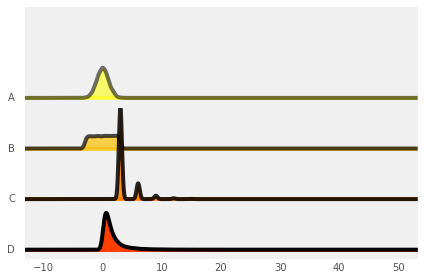

In [0]:
import joypy
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
pepito = np.transpose([data, data1, data2, data3])
tmp_df = pd.DataFrame(pepito, columns=['A','B','C','D'])

fig, axes = joypy.joyplot(tmp_df,colormap=cm.autumn_r,fade=True);

### Ejercicio:

Dada la pandemia desencadenada por el COVID19, deseamos entender mejor la propagación del virus. Anteriormente obtuvimos un archivos CSV que contiene ***los casos confirmados acumulados por día y país***.

Utiliza este archivo para:

1. Calcular el número de casos ***nuevos*** por día y país.

2. Comparar el incremento de casos por dia utilizando un ``joyplot``.

Utilice 

https://sbebo.github.io/posts/2017/08/01/joypy/

https://github.com/sbebo/joypy/blob/master/Joyplot.ipynb

https://github.com/sbebo/joypy/blob/master/joypy/joyplot.py

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html


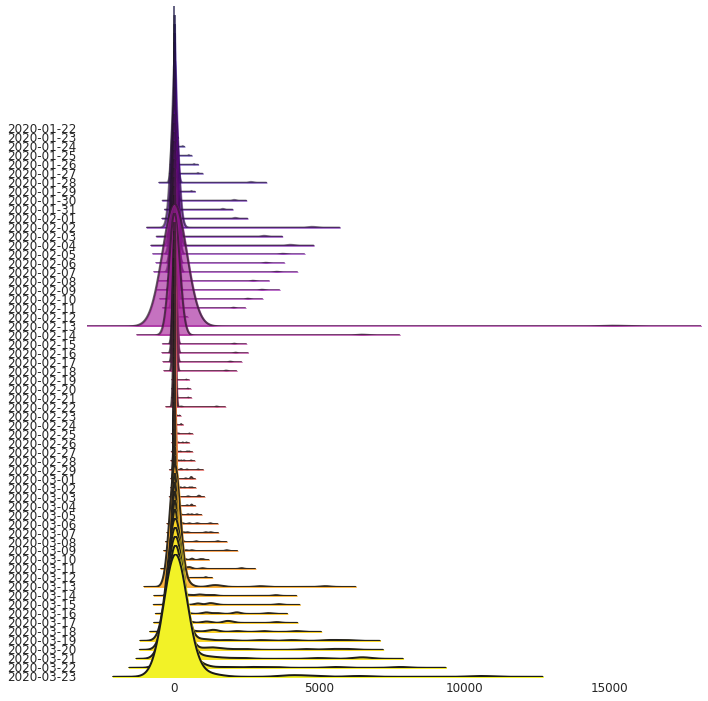

In [0]:
#Your answer here

¿Se parece a lo reportado por la Universidad John Hopkins?

https://coronavirus.jhu.edu/map.html

<img src="https://docs.google.com/uc?export=download&id=1jTu7kE9YSFME50qC3xO2OLXixG2ik6-_" width="800" align="middle">

Evidentemente, no hay nuevos casos **negativos**.

¿Qué necesitamos hacer para ajustar el joyplot?

---
## Gráficos de Dispersión (Scatter Plot) y ``lmplot``.

Un diagrama o gráfico de dispersión, es un tipo de diagrama matemático que utiliza **coordenadas cartesianas** para **mostrar valores** de, típicamente, **dos variables de un conjunto de datos**. 

**Los puntos** en el gráfico pueden **codificarse con otras variables usando color, forma o tamaño**. 

Los datos se muestran como una colección de puntos, cada uno con el valor de una variable que determina la posición en el eje $x$ y el valor de la otra variable que determina la posición en el eje $y$.

Por ejemplo, hagamos un ``scatterplot`` de los **nuevos casos por día de COVID19 para México**.

Modifique el tamaño de acuerdo a los nuevos casos por día de otros paises de America.
    ***¿Qué observa?***


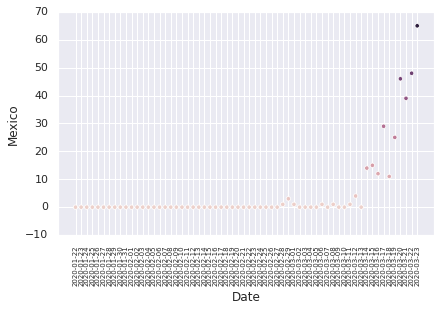

In [0]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

cmap = sns.cubehelix_palette(as_cmap=True)

ax = sns.scatterplot(x="Date", y="Mexico",hue='Mexico',
                     palette=cmap,legend=False, 
                     data=df3)

ax.tick_params('x', labelrotation=90, labelsize=7)

Comparemos directamente los paises de America con México en el ``scatterplot``.

Se observa que existe una **CORRELACIÓN positiva** en los datos, ¿cierto?

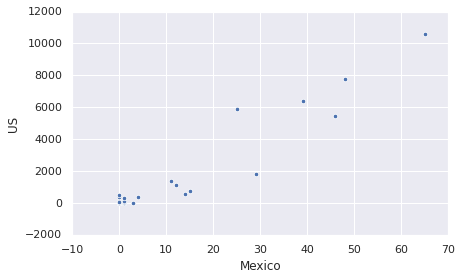

In [0]:
ax = sns.scatterplot(x="Mexico", y="US", data=df3)

Podriamos "constatar" esta relación utilizando una linea: 
$$y=b+mx$$

Tal que $b$ es la ordenada al origen y $m$ la pendiente de la linea.

Por lo pronto, dejemos que ``seaborn`` haga el trabajo pesado utilizando ``lmplot``.

#### La regresión muestra que existe una **CORRELACIÓN positiva**.

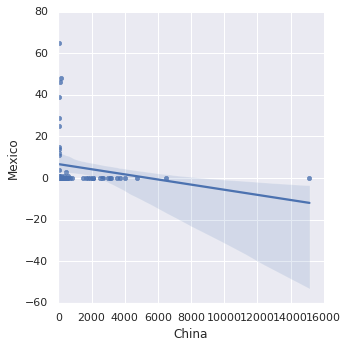

In [0]:
ax = sns.lmplot(x="China", y="Mexico",
                data=df3)

Examinemos a detalle el modelo de la regresión lineal usando ``statsmodel``.

¿Pueden identificar cual es el país de America que tiene mayor correlación de casos nuevos por día respecto a **México**?

In [0]:
import statsmodels.formula.api as smf

results = smf.ols('Mexico ~ Spain', data=df3).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Mexico   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     292.7
Date:                Fri, 27 Mar 2020   Prob (F-statistic):           5.60e-35
Time:                        19:58:37   Log-Likelihood:                -161.54
No. Observations:                  62   AIC:                             331.1
Df Residuals:                      58   BIC:                             339.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0720      0.501     -0.144      0.8

# TAREA:

Hacer un **Dashboard** con los casos nuevos diarios de COVID19 por paises, de acuerdo a la idea de que existe **un patrón estacional**.

<img src="https://docs.google.com/uc?export=download&id=1Oc1fs0zpnYDKTTVeiQ8T5E0lxa99b1ME" width="800" align="middle">

El dashboard debe incluir al menos 1 de cada uno de los gráficos vistos en este sub-módulo (``hist``, ``hist2D``/``hexbin``, ``joyplot``, ``scatterplot``/``lmplot``).

Utilice como guía: https://matplotlib.org/3.2.1/tutorials/intermediate/gridspec.html

### Dashboard: 

Un "Dashboard" o tablero, es un tipo de interfaz gráfica que es utilizado para proporcionar una vista rápida de diversos indicadores (por ejemplo, en un negocio estos se llama indicadores clave de rendimiento -KPI-) relevantes para un objetivo particular. 